<a href="https://colab.research.google.com/github/abdyraman/gas-emissions/blob/main/Co2emissions_poverty_international.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#data
base_df = pd.read_csv('owid-co2-data.csv', index_col=False)
base_df2 = pd.read_csv('poverty-share-on-less-than-30-per-day.csv', index_col=False)


In [19]:
df = base_df[['country', 'year', 'co2','co2_per_capita']]
df = df[(df['co2'] > 0) & (df['country'] != 'World')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23630 entries, 0 to 25203
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         23630 non-null  object 
 1   year            23630 non-null  int64  
 2   co2             23630 non-null  float64
 3   co2_per_capita  23033 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 923.0+ KB


In [20]:
df_range = df[(df['year'] > 1989) & (df['year'] < 2020)].reset_index(drop = True)
print(df_range.head())
print(df_range.info())

       country  year    co2  co2_per_capita
0  Afghanistan  1990  2.603           0.210
1  Afghanistan  1991  2.427           0.182
2  Afghanistan  1992  1.379           0.095
3  Afghanistan  1993  1.333           0.084
4  Afghanistan  1994  1.282           0.075
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6929 entries, 0 to 6928
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         6929 non-null   object 
 1   year            6929 non-null   int64  
 2   co2             6929 non-null   float64
 3   co2_per_capita  6821 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 216.7+ KB
None


In [21]:
df_poverty = base_df2[['Entity', 'Year', '$30.00 per day - share of population below poverty line']]
df_poverty.columns = ['country', 'year', '$30.00 per day - share of population below poverty line']
df_poverty = df_poverty[df_poverty['country'] != 'World'] #there is no null value anymore
df_poverty.head()

,country,year,$30.00 per day - share of population below poverty line
0,Albania,1981,99.91247
1,Albania,1982,99.91247
2,Albania,1983,99.91247
3,Albania,1984,99.91247
4,Albania,1985,99.91247


In [23]:
df_pov_range = df_poverty[(df_poverty['year'] > 1989) & (df_poverty['year'] < 2020)].reset_index(drop = True)
print(df_pov_range.head())
print(df_pov_range.info())

   country  year  $30.00 per day - share of population below poverty line
0  Albania  1990                                           99.91247      
1  Albania  1991                                           99.95166      
2  Albania  1992                                           99.96992      
3  Albania  1993                                           99.95166      
4  Albania  1994                                           99.95166      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5361 entries, 0 to 5360
Data columns (total 3 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   country                                                  5361 non-null   object 
 1   year                                                     5361 non-null   int64  
 2   $30.00 per day - share of population below poverty line  5361 non-null   float64
dtypes: float64(1), 

In [24]:
# on df_range I have 6929 rows and df2_range I have 5361 rows. I want to merge this two dataframe and the expected dataframe should have 5361 rows.
df_combined = df_pov_range.merge(df_range,how='left', on=['country','year'])

In [25]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5361 entries, 0 to 5360
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   country                                                  5361 non-null   object 
 1   year                                                     5361 non-null   int64  
 2   $30.00 per day - share of population below poverty line  5361 non-null   float64
 3   co2                                                      4914 non-null   float64
 4   co2_per_capita                                           4874 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 251.3+ KB


In [26]:
px.line(df_combined, x = 'year', y = 'co2', color='country', title = 'co2 emissions vs time')

In [27]:
px.line(df_combined, x = 'year', y = '$30.00 per day - share of population below poverty line', color='country', title = 'percentage of population below poverty line vs time')

In [28]:
px.scatter(df_combined[df_combined['year']==2019], x="co2", y="$30.00 per day - share of population below poverty line",
            color ="country", hover_name="country", log_x=True, size_max=60, title = '2019')

In [32]:
def plot_data_for_country(df, country_name):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax2.set_ylim(0, 110)

    df_country = df[df['country'] == country_name].reset_index(drop=True)

    col1 = '#72bd34'
    col2 = '#f84300'

    plot_1 = ax1.plot(df_country['year'], df_country['co2'], color=col1, label='co2 emissions')
    plot_2 = ax2.plot(df_country['year'], df_country['$30.00 per day - share of population below poverty line'], color=col2, label='poverty')

    ax1.set_xlabel('Year', fontsize=10)
    ax1.set_ylabel('co2 emissions (Gt)', fontsize=10)
    ax2.set_ylabel('share of population below poverty line', fontsize=10)
    ax2.set_title(country_name)

    lns = plot_1 + plot_2
    labels = [l.get_label() for l in lns]
    plt.legend(lns, labels, loc=4)

    plt.show()




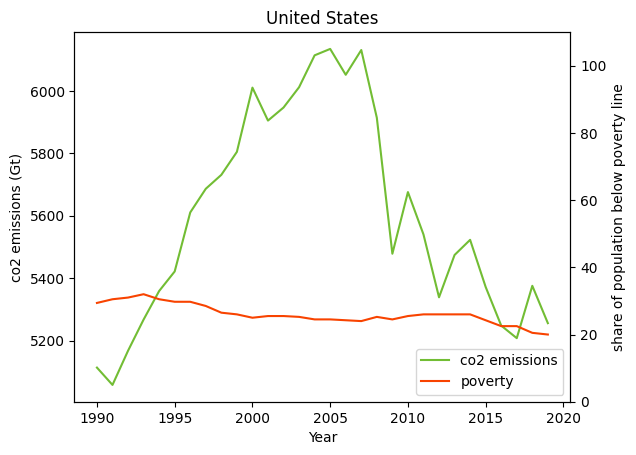

In [42]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "United States")

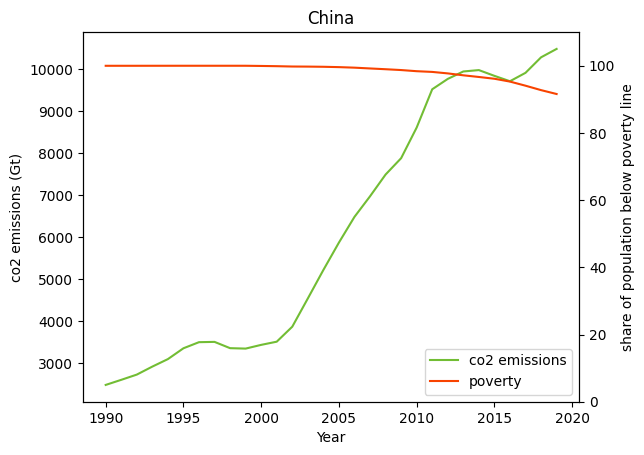

In [34]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "China")

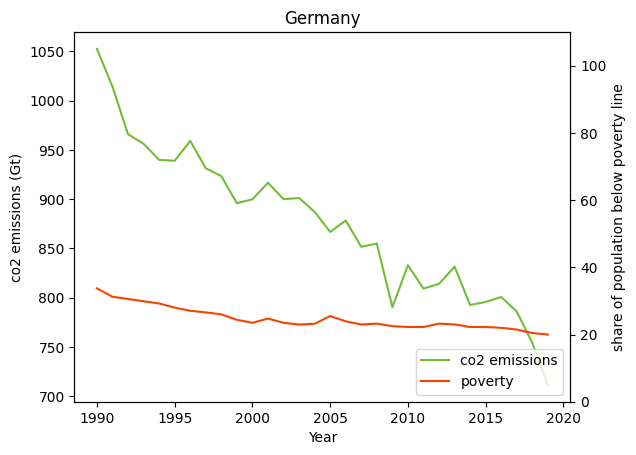

In [43]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "Germany")

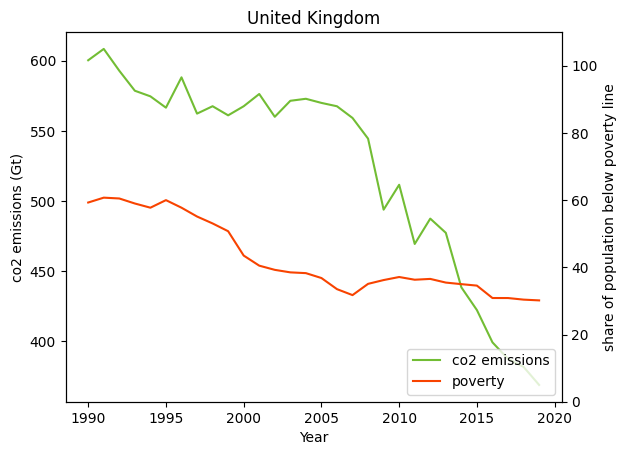

In [44]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "United Kingdom")

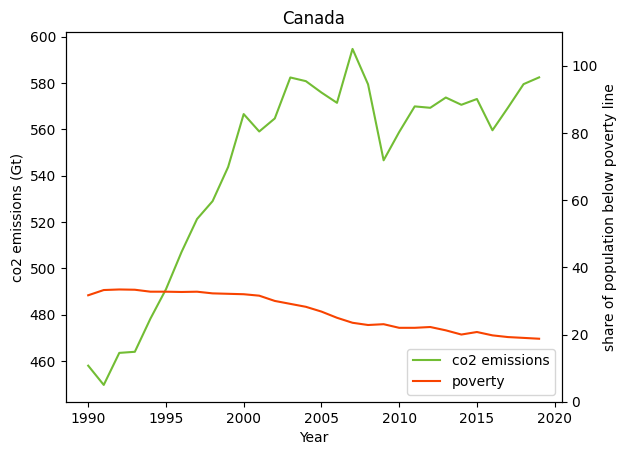

In [45]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "Canada")

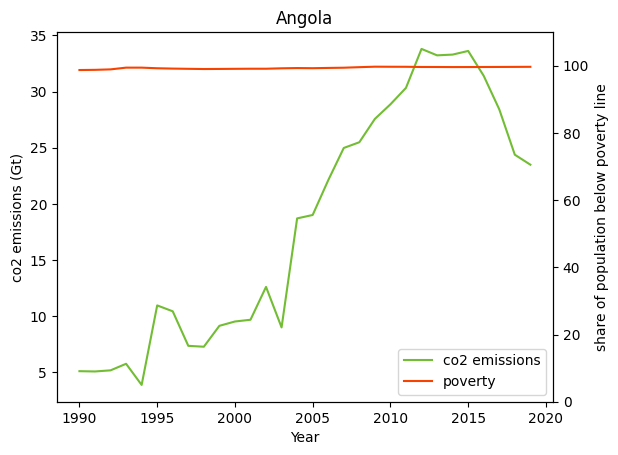

In [35]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "Angola")

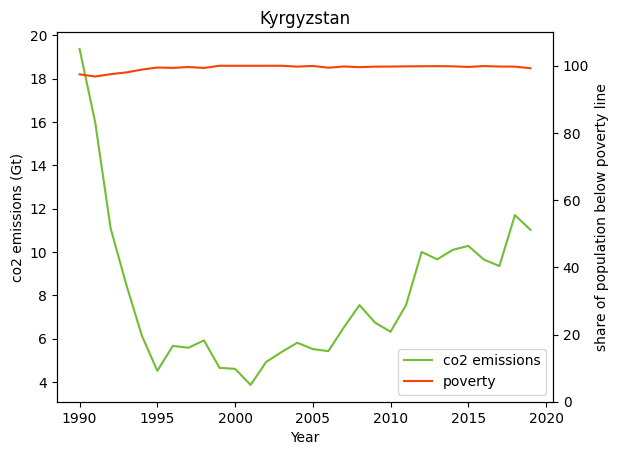

In [36]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "Kyrgyzstan")

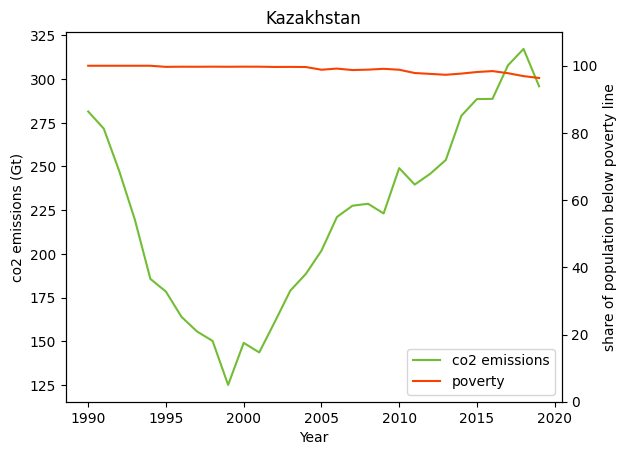

In [37]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "Kazakhstan")

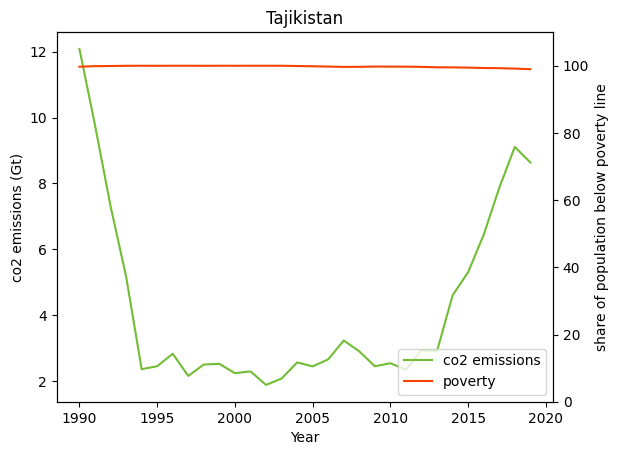

In [39]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "Tajikistan")

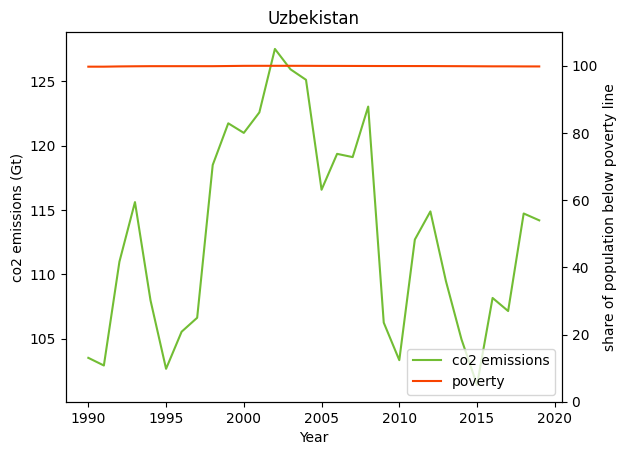

In [40]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "Uzbekistan")

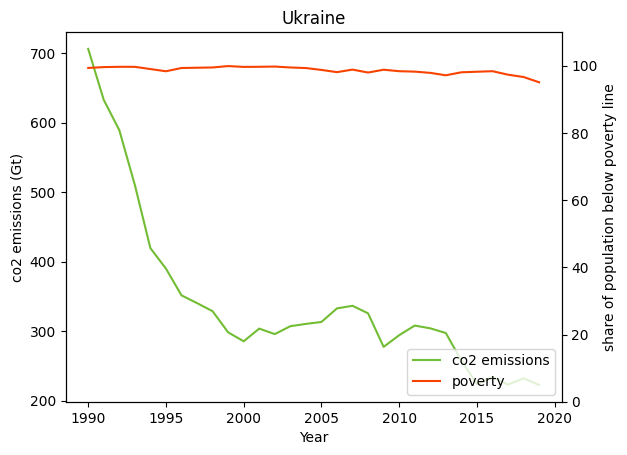

In [46]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "Ukraine")

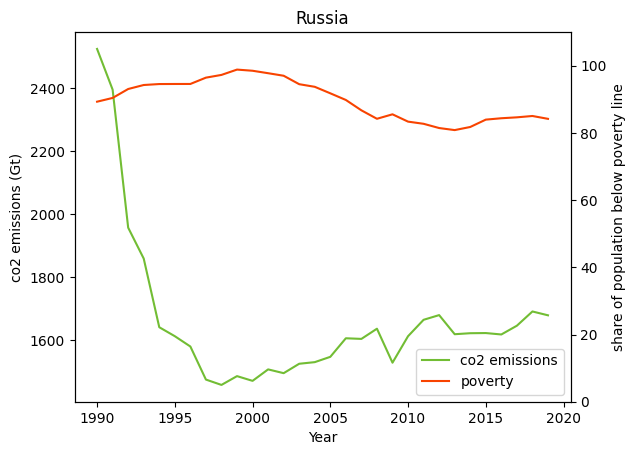

In [47]:
# Call the function with the country name you want to visualize
plot_data_for_country(df_combined, "Russia")